## Observations and Insights 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
print(mouse_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# id_index = mouse_df.set_index("Mouse ID")
# id_index.head()

In [3]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# mouse_df.dtypes
# id_group = mouse_df.groupby('Mouse ID')
# id_group.count()

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# example = mouse_df.groupby('Mouse ID').filter(lambda x: x.Timepoint.value_counts().max() < 2)
# print(example)
# mouse_df.set_index("Mouse ID")
count = mouse_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count()
duplicated_index = []
for index, i in enumerate(count):
    if i == 2:
        duplicated_index.append(index)
mouse_df.loc[duplicated_index[0]:duplicated_index[-1]+1]["Mouse ID"]
# a963 and b313 are the ids that need to be deleted

586    a963
587    a963
588    b313
589    b313
590    b313
591    b313
Name: Mouse ID, dtype: object

In [14]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_cleaned = mouse_df.loc[mouse_df["Mouse ID"] != 'a963']
mouse_df_cleaned = mouse_df.loc[mouse_df["Mouse ID"] != 'b313']


247

In [15]:
# Checking the number of mice in the clean DataFrame.
mouse_df_cleaned["Mouse ID"].nunique()

247

In [66]:
mouse_df_cleaned["Drug Regimen"].unique()
# ramicane = mouse_df.loc[mouse_df["Drug Regimen"] == "Ramicane"]
# ramicane

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# # This method is the most straighforward, creating multiple series and putting them all together at the end.
ramicane = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Ramicane"]
ramicane_start = ramicane.loc[ramicane["Timepoint"] == 0]
ramicane_mean = ramicane_start["Tumor Volume (mm3)"].mean()
ramicane_median = ramicane_start["Tumor Volume (mm3)"].median()
ramicane_variance = ramicane_start["Tumor Volume (mm3)"].var()
ramicane_std = ramicane_start["Tumor Volume (mm3)"].std()
ramicane_sem = ramicane_start["Tumor Volume (mm3)"].sem()
ramicane_vals = [ramicane_mean, ramicane_median, ramicane_variance, ramicane_std, ramicane_sem]
# print(ramicane_vals)

capomulin = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_start = capomulin.loc[capomulin["Timepoint"] == 0]
capomulin_mean = capomulin_start["Tumor Volume (mm3)"].mean()
capolmulin_median = capomulin_start["Tumor Volume (mm3)"].median()
capomulin_variance = capomulin_start["Tumor Volume (mm3)"].var()
capomulin_std = capomulin_start["Tumor Volume (mm3)"].std()
capomulin_sem = capomulin_start["Tumor Volume (mm3)"].sem()
capomulin_vals = [capomulin_mean, capolmulin_median, capomulin_variance, capomulin_std, capomulin_sem]

infubinol = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Infubinol"]
infubinol_start = infubinol.loc[infubinol["Timepoint"] == 0]
infubinol_mean = infubinol_start["Tumor Volume (mm3)"].mean()
infubinol_median = infubinol_start["Tumor Volume (mm3)"].median()
infubinol_variance = infubinol_start["Tumor Volume (mm3)"].var()
infubinol_std = infubinol_start["Tumor Volume (mm3)"].std()
infubinol_sem = infubinol_start["Tumor Volume (mm3)"].sem()
infubinol_vals = [infubinol_mean, infubinol_median, infubinol_variance, infubinol_std, infubinol_sem]


placebo = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Placebo"]
placebo_start = placebo.loc[placebo["Timepoint"] == 0]
placebo_mean = placebo_start["Tumor Volume (mm3)"].mean()
placebo_median = placebo_start["Tumor Volume (mm3)"].median()
placebo_variance = placebo_start["Tumor Volume (mm3)"].var()
placebo_std = placebo_start["Tumor Volume (mm3)"].std()
placebo_sem = placebo_start["Tumor Volume (mm3)"].sem()
placebo_vals = [placebo_mean, placebo_median, placebo_variance, placebo_std, placebo_sem]

ceftamin = mouse_df_cleaned[mouse_df_cleaned["Drug Regimen"] == "Ceftamin"]
ceftamin_start = ceftamin.loc[ceftamin["Timepoint"] == 0]
ceftamin_mean = ceftamin_start["Tumor Volume (mm3)"].mean()
ceftamin_median = ceftamin_start["Tumor Volume (mm3)"].median()
ceftamin_variance = ceftamin_start["Tumor Volume (mm3)"].var()
ceftamin_std = ceftamin_start["Tumor Volume (mm3)"].std()
ceftamin_sem = ceftamin_start["Tumor Volume (mm3)"].sem()
ceftamin_vals = [ceftamin_mean, ceftamin_median, ceftamin_variance, ceftamin_std, ceftamin_sem]

stelasyn = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == 'Stelasyn']
stelasyn_start = stelasyn.loc[stelasyn["Timepoint"] == 0]
stelasyn_mean = stelasyn_start["Tumor Volume (mm3)"].mean()
stelasyn_median = stelasyn_start["Tumor Volume (mm3)"].median()
stelasyn_variance = stelasyn_start["Tumor Volume (mm3)"].var()
stelasyn_std = stelasyn_start["Tumor Volume (mm3)"].std()
stelasyn_sem = stelasyn_start["Tumor Volume (mm3)"].sem()
stelasyn_vals = [stelasyn_mean, stelasyn_median, stelasyn_variance, stelasyn_std, stelasyn_sem]

zoniferol = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == 'Zoniferol']
zoniferol_start = zoniferol.loc[zoniferol["Timepoint"] == 0]
zoniferol_mean = zoniferol_start["Tumor Volume (mm3)"].mean()
zoniferol_median = zoniferol_start["Tumor Volume (mm3)"].median()
zoniferol_variance = zoniferol_start["Tumor Volume (mm3)"].var()
zoniferol_std = zoniferol_start["Tumor Volume (mm3)"].std()
zoniferol_sem = zoniferol_start["Tumor Volume (mm3)"].sem()
zoniferol_vals = [zoniferol_mean, zoniferol_median, zoniferol_variance, zoniferol_std, zoniferol_sem]

ketapril = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == 'Ketapril']
ketapril_start = ketapril.loc[ketapril["Timepoint"] == 0]
ketapril_mean = ketapril_start["Tumor Volume (mm3)"].mean()
ketapril_median = ketapril_start["Tumor Volume (mm3)"].median()
ketapril_variance = ketapril_start["Tumor Volume (mm3)"].var()
ketapril_std = ketapril_start["Tumor Volume (mm3)"].std()
ketapril_sem = ketapril_start["Tumor Volume (mm3)"].sem()
ketapril_vals = [ketapril_mean, ketapril_median, ketapril_variance, ketapril_std, ketapril_sem]

propriva = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Propriva"]
propriva_start = propriva.loc[propriva["Timepoint"] == 0]
propriva_mean = propriva_start["Tumor Volume (mm3)"].mean()
propriva_median = propriva_start["Tumor Volume (mm3)"].median()
propriva_variance = propriva_start["Tumor Volume (mm3)"].var()
propriva_std = propriva_start["Tumor Volume (mm3)"].std()
propriva_sem = propriva_start["Tumor Volume (mm3)"].sem()
propriva_vals = [propriva_mean, propriva_median, propriva_variance, propriva_std, propriva_sem]

naftisol = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Naftisol"]
naftisol_start = naftisol.loc[naftisol["Timepoint"] == 0]
naftisol_mean = naftisol_start["Tumor Volume (mm3)"].mean()
naftisol_median = naftisol_start["Tumor Volume (mm3)"].median()
naftisol_variance = naftisol_start["Tumor Volume (mm3)"].var()
naftisol_std = naftisol_start["Tumor Volume (mm3)"].std()
naftisol_sem = naftisol_start["Tumor Volume (mm3)"].sem()
naftisol_vals = [naftisol_mean, naftisol_median, naftisol_variance, naftisol_std, naftisol_sem]


summary_stats_df = pd.DataFrame({
    "Ramicane": ramicane_vals,
    "Capomulin": capomulin_vals,
    "Infubinol": infubinol_vals,
    "Placebo": placebo_vals,
    "Ceftamin": ceftamin_vals,
    "Stelasyn": stelasyn_vals,
    "Ketapril": ketapril_vals,
    "Propriva": propriva_vals,
    "Naftisol": naftisol_vals
})
# summary_stats_df = summary_stats_df.set_index[pd.Index(["Mean", "Median", "Variance", "Std Deviation", "SEM"])]
summary_stats_df.index = ["Mean", "Median", "Variance", "Std Deviation", "SEM"]
summary_stats_df

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Ketapril,Propriva,Naftisol
Mean,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
Median,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
Variance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Std Deviation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bar and Pie Charts

<AxesSubplot:xlabel='Timepoint'>

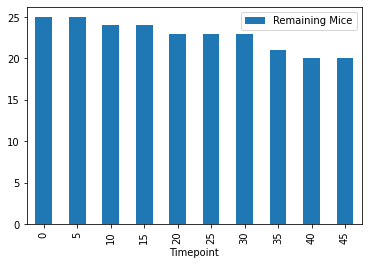

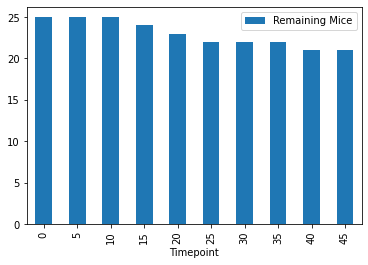

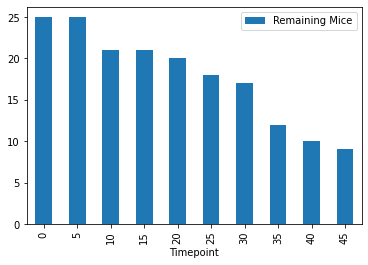

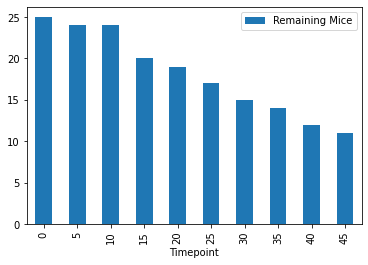

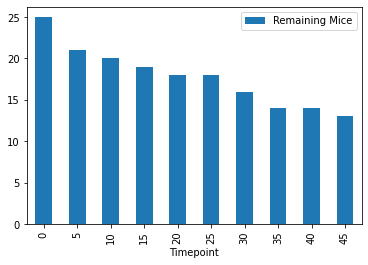

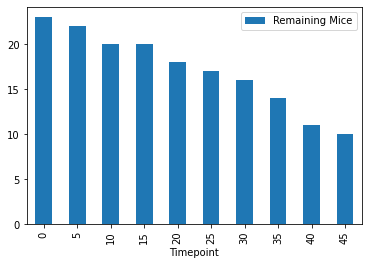

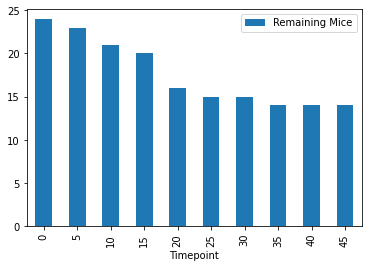

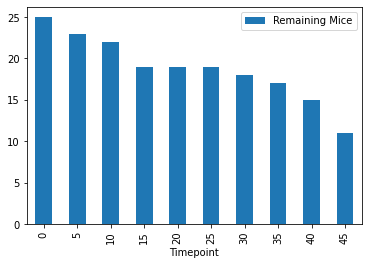

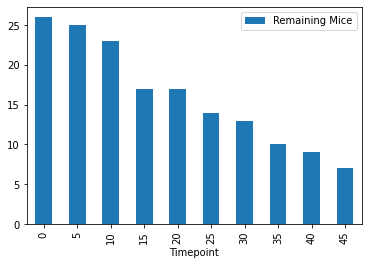

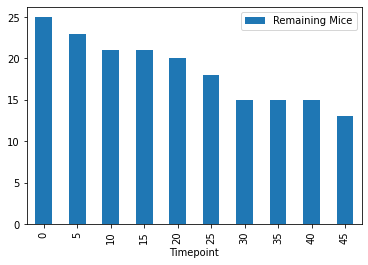

In [118]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
drug_regimen_group = mouse_df_cleaned.groupby(['Drug Regimen', 'Timepoint'])
# ramicane = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Ramicane"]
ramicane_group_zero_count = drug_regimen_group.get_group(('Ramicane', 0))["Mouse ID"].count()
ramicane_group_five_count = drug_regimen_group.get_group(('Ramicane', 5))["Mouse ID"].count()
ramicane_group_ten_count = drug_regimen_group.get_group(('Ramicane', 10))["Mouse ID"].count()
ramicane_group_fifteen_count = drug_regimen_group.get_group(('Ramicane', 15))["Mouse ID"].count()
ramicane_group_twenty_count = drug_regimen_group.get_group(('Ramicane', 20))["Mouse ID"].count()
ramicane_group_twentyfive_count = drug_regimen_group.get_group(('Ramicane', 25))["Mouse ID"].count()
ramicane_group_thirty_count = drug_regimen_group.get_group(('Ramicane', 30))["Mouse ID"].count()
ramicane_group_thirtyfive_count = drug_regimen_group.get_group(('Ramicane', 35))["Mouse ID"].count()
ramicane_group_forty_count = drug_regimen_group.get_group(('Ramicane', 40))["Mouse ID"].count()
ramicane_group_fortyfive_count = drug_regimen_group.get_group(('Ramicane', 45))["Mouse ID"].count()
ramicane_vals = [
    ramicane_group_zero_count, ramicane_group_five_count, ramicane_group_ten_count, ramicane_group_fifteen_count,
    ramicane_group_twenty_count, ramicane_group_twentyfive_count, ramicane_group_thirty_count, 
    ramicane_group_thirtyfive_count, ramicane_group_forty_count, ramicane_group_fortyfive_count
]
ramicane_df = pd.DataFrame({
    'Remaining Mice': ramicane_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
ramicane_df.plot.bar(x='Timepoint', y='Remaining Mice')



capomulin_group_zero_count = drug_regimen_group.get_group(('Capomulin', 0))["Mouse ID"].count()
capomulin_group_five_count = drug_regimen_group.get_group(('Capomulin', 5))["Mouse ID"].count()
capomulin_group_ten_count = drug_regimen_group.get_group(('Capomulin', 10))["Mouse ID"].count()
capomulin_group_fifteen_count = drug_regimen_group.get_group(('Capomulin', 15))["Mouse ID"].count()
capomulin_group_twenty_count = drug_regimen_group.get_group(('Capomulin', 20))["Mouse ID"].count()
capomulin_group_twentyfive_count = drug_regimen_group.get_group(('Capomulin', 25))["Mouse ID"].count()
capomulin_group_thirty_count = drug_regimen_group.get_group(('Capomulin', 30))["Mouse ID"].count()
capomulin_group_thirtyfive_count = drug_regimen_group.get_group(('Capomulin', 35))["Mouse ID"].count()
capomulin_group_forty_count = drug_regimen_group.get_group(('Capomulin', 40))["Mouse ID"].count()
capomulin_group_fortyfive_count = drug_regimen_group.get_group(('Capomulin', 45))["Mouse ID"].count()
capomulin_vals = [
    capomulin_group_zero_count, capomulin_group_five_count, capomulin_group_ten_count, capomulin_group_fifteen_count,
   capomulin_group_twenty_count, capomulin_group_twentyfive_count, capomulin_group_thirty_count, 
    capomulin_group_thirtyfive_count, capomulin_group_forty_count, capomulin_group_fortyfive_count
]
capomulin_df = pd.DataFrame({
    'Remaining Mice': capomulin_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
capomulin_df.plot.bar(x='Timepoint', y='Remaining Mice')

infubinol_group_zero_count = drug_regimen_group.get_group(('Infubinol', 0))["Mouse ID"].count()
infubinol_group_five_count = drug_regimen_group.get_group(('Infubinol', 5))["Mouse ID"].count()
infubinol_group_ten_count = drug_regimen_group.get_group(('Infubinol', 10))["Mouse ID"].count()
infubinol_group_fifteen_count = drug_regimen_group.get_group(('Infubinol', 15))["Mouse ID"].count()
infubinol_group_twenty_count = drug_regimen_group.get_group(('Infubinol', 20))["Mouse ID"].count()
infubinol_group_twentyfive_count = drug_regimen_group.get_group(('Infubinol', 25))["Mouse ID"].count()
infubinol_group_thirty_count = drug_regimen_group.get_group(('Infubinol', 30))["Mouse ID"].count()
infubinol_group_thirtyfive_count = drug_regimen_group.get_group(('Infubinol', 35))["Mouse ID"].count()
infubinol_group_forty_count = drug_regimen_group.get_group(('Infubinol', 40))["Mouse ID"].count()
infubinol_group_fortyfive_count = drug_regimen_group.get_group(('Infubinol', 45))["Mouse ID"].count()
infubinol_vals = [
    infubinol_group_zero_count, infubinol_group_five_count, infubinol_group_ten_count, infubinol_group_fifteen_count,
   infubinol_group_twenty_count, infubinol_group_twentyfive_count, infubinol_group_thirty_count, 
    infubinol_group_thirtyfive_count, infubinol_group_forty_count, infubinol_group_fortyfive_count
]
infubinol_df = pd.DataFrame({
    'Remaining Mice': infubinol_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
infubinol_df.plot.bar(x='Timepoint', y='Remaining Mice')

placebo_group_zero_count = drug_regimen_group.get_group(('Placebo', 0))["Mouse ID"].count()
placebo_group_five_count = drug_regimen_group.get_group(('Placebo', 5))["Mouse ID"].count()
placebo_group_ten_count = drug_regimen_group.get_group(('Placebo', 10))["Mouse ID"].count()
placebo_group_fifteen_count = drug_regimen_group.get_group(('Placebo', 15))["Mouse ID"].count()
placebo_group_twenty_count = drug_regimen_group.get_group(('Placebo', 20))["Mouse ID"].count()
placebo_group_twentyfive_count = drug_regimen_group.get_group(('Placebo', 25))["Mouse ID"].count()
placebo_group_thirty_count = drug_regimen_group.get_group(('Placebo', 30))["Mouse ID"].count()
placebo_group_thirtyfive_count = drug_regimen_group.get_group(('Placebo', 35))["Mouse ID"].count()
placebo_group_forty_count = drug_regimen_group.get_group(('Placebo', 40))["Mouse ID"].count()
placebo_group_fortyfive_count = drug_regimen_group.get_group(('Placebo', 45))["Mouse ID"].count()
placebo_vals = [
    placebo_group_zero_count, placebo_group_five_count, placebo_group_ten_count, placebo_group_fifteen_count,
   placebo_group_twenty_count, placebo_group_twentyfive_count, placebo_group_thirty_count, 
    placebo_group_thirtyfive_count, placebo_group_forty_count, placebo_group_fortyfive_count
]
placebo_df = pd.DataFrame({
    'Remaining Mice': placebo_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
placebo_df.plot.bar(x='Timepoint', y='Remaining Mice')


ceftamin_group_zero_count = drug_regimen_group.get_group(('Ceftamin', 0))["Mouse ID"].count()
ceftamin_group_five_count = drug_regimen_group.get_group(('Ceftamin', 5))["Mouse ID"].count()
ceftamin_group_ten_count = drug_regimen_group.get_group(('Ceftamin', 10))["Mouse ID"].count()
ceftamin_group_fifteen_count = drug_regimen_group.get_group(('Ceftamin', 15))["Mouse ID"].count()
ceftamin_group_twenty_count = drug_regimen_group.get_group(('Ceftamin', 20))["Mouse ID"].count()
ceftamin_group_twentyfive_count = drug_regimen_group.get_group(('Ceftamin', 25))["Mouse ID"].count()
ceftamin_group_thirty_count = drug_regimen_group.get_group(('Ceftamin', 30))["Mouse ID"].count()
ceftamin_group_thirtyfive_count = drug_regimen_group.get_group(('Ceftamin', 35))["Mouse ID"].count()
ceftamin_group_forty_count = drug_regimen_group.get_group(('Ceftamin', 40))["Mouse ID"].count()
ceftamin_group_fortyfive_count = drug_regimen_group.get_group(('Ceftamin', 45))["Mouse ID"].count()
ceftamin_vals = [
    ceftamin_group_zero_count, ceftamin_group_five_count, ceftamin_group_ten_count, ceftamin_group_fifteen_count,
   ceftamin_group_twenty_count, ceftamin_group_twentyfive_count, ceftamin_group_thirty_count, 
    ceftamin_group_thirtyfive_count, ceftamin_group_forty_count, ceftamin_group_fortyfive_count
]
ceftamin_df = pd.DataFrame({
    'Remaining Mice': ceftamin_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
ceftamin_df.plot.bar(x='Timepoint', y='Remaining Mice')


stelasyn_group_zero_count = drug_regimen_group.get_group(('Stelasyn', 0))["Mouse ID"].count()
stelasyn_group_five_count = drug_regimen_group.get_group(('Stelasyn', 5))["Mouse ID"].count()
stelasyn_group_ten_count = drug_regimen_group.get_group(('Stelasyn', 10))["Mouse ID"].count()
stelasyn_group_fifteen_count = drug_regimen_group.get_group(('Stelasyn', 15))["Mouse ID"].count()
stelasyn_group_twenty_count = drug_regimen_group.get_group(('Stelasyn', 20))["Mouse ID"].count()
stelasyn_group_twentyfive_count = drug_regimen_group.get_group(('Stelasyn', 25))["Mouse ID"].count()
stelasyn_group_thirty_count = drug_regimen_group.get_group(('Stelasyn', 30))["Mouse ID"].count()
stelasyn_group_thirtyfive_count = drug_regimen_group.get_group(('Stelasyn', 35))["Mouse ID"].count()
stelasyn_group_forty_count = drug_regimen_group.get_group(('Stelasyn', 40))["Mouse ID"].count()
stelasyn_group_fortyfive_count = drug_regimen_group.get_group(('Stelasyn', 45))["Mouse ID"].count()
stelasyn_vals = [
    stelasyn_group_zero_count, stelasyn_group_five_count, stelasyn_group_ten_count, stelasyn_group_fifteen_count,
   stelasyn_group_twenty_count, stelasyn_group_twentyfive_count, stelasyn_group_thirty_count, 
    stelasyn_group_thirtyfive_count, stelasyn_group_forty_count, stelasyn_group_fortyfive_count
]
stelasyn_df = pd.DataFrame({
    'Remaining Mice': stelasyn_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
stelasyn_df.plot.bar(x='Timepoint', y='Remaining Mice')


zoniferol_group_zero_count = drug_regimen_group.get_group(('Zoniferol', 0))["Mouse ID"].count()
zoniferol_group_five_count = drug_regimen_group.get_group(('Zoniferol', 5))["Mouse ID"].count()
zoniferol_group_ten_count = drug_regimen_group.get_group(('Zoniferol', 10))["Mouse ID"].count()
zoniferol_group_fifteen_count = drug_regimen_group.get_group(('Zoniferol', 15))["Mouse ID"].count()
zoniferol_group_twenty_count = drug_regimen_group.get_group(('Zoniferol', 20))["Mouse ID"].count()
zoniferol_group_twentyfive_count = drug_regimen_group.get_group(('Zoniferol', 25))["Mouse ID"].count()
zoniferol_group_thirty_count = drug_regimen_group.get_group(('Zoniferol', 30))["Mouse ID"].count()
zoniferol_group_thirtyfive_count = drug_regimen_group.get_group(('Zoniferol', 35))["Mouse ID"].count()
zoniferol_group_forty_count = drug_regimen_group.get_group(('Zoniferol', 40))["Mouse ID"].count()
zoniferol_group_fortyfive_count = drug_regimen_group.get_group(('Zoniferol', 45))["Mouse ID"].count()
zoniferol_vals = [
    zoniferol_group_zero_count, zoniferol_group_five_count, zoniferol_group_ten_count, zoniferol_group_fifteen_count,
   zoniferol_group_twenty_count, zoniferol_group_twentyfive_count, zoniferol_group_thirty_count, 
    zoniferol_group_thirtyfive_count, zoniferol_group_forty_count, zoniferol_group_fortyfive_count
]
zoniferol_df = pd.DataFrame({
    'Remaining Mice': zoniferol_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
zoniferol_df.plot.bar(x='Timepoint', y='Remaining Mice')


ketapril_group_zero_count = drug_regimen_group.get_group(('Ketapril', 0))["Mouse ID"].count()
ketapril_group_five_count = drug_regimen_group.get_group(('Ketapril', 5))["Mouse ID"].count()
ketapril_group_ten_count = drug_regimen_group.get_group(('Ketapril', 10))["Mouse ID"].count()
ketapril_group_fifteen_count = drug_regimen_group.get_group(('Ketapril', 15))["Mouse ID"].count()
ketapril_group_twenty_count = drug_regimen_group.get_group(('Ketapril', 20))["Mouse ID"].count()
ketapril_group_twentyfive_count = drug_regimen_group.get_group(('Ketapril', 25))["Mouse ID"].count()
ketapril_group_thirty_count = drug_regimen_group.get_group(('Ketapril', 30))["Mouse ID"].count()
ketapril_group_thirtyfive_count = drug_regimen_group.get_group(('Ketapril', 35))["Mouse ID"].count()
ketapril_group_forty_count = drug_regimen_group.get_group(('Ketapril', 40))["Mouse ID"].count()
ketapril_group_fortyfive_count = drug_regimen_group.get_group(('Ketapril', 45))["Mouse ID"].count()
ketapril_vals = [
    ketapril_group_zero_count, ketapril_group_five_count, ketapril_group_ten_count, ketapril_group_fifteen_count,
   ketapril_group_twenty_count, ketapril_group_twentyfive_count, ketapril_group_thirty_count, 
    ketapril_group_thirtyfive_count, ketapril_group_forty_count, ketapril_group_fortyfive_count
]
ketapril_df = pd.DataFrame({
    'Remaining Mice': ketapril_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
ketapril_df.plot.bar(x='Timepoint', y='Remaining Mice')


propriva_group_zero_count = drug_regimen_group.get_group(('Propriva', 0))["Mouse ID"].count()
propriva_group_five_count = drug_regimen_group.get_group(('Propriva', 5))["Mouse ID"].count()
propriva_group_ten_count = drug_regimen_group.get_group(('Propriva', 10))["Mouse ID"].count()
propriva_group_fifteen_count = drug_regimen_group.get_group(('Propriva', 15))["Mouse ID"].count()
propriva_group_twenty_count = drug_regimen_group.get_group(('Propriva', 20))["Mouse ID"].count()
propriva_group_twentyfive_count = drug_regimen_group.get_group(('Propriva', 25))["Mouse ID"].count()
propriva_group_thirty_count = drug_regimen_group.get_group(('Propriva', 30))["Mouse ID"].count()
propriva_group_thirtyfive_count = drug_regimen_group.get_group(('Propriva', 35))["Mouse ID"].count()
propriva_group_forty_count = drug_regimen_group.get_group(('Propriva', 40))["Mouse ID"].count()
propriva_group_fortyfive_count = drug_regimen_group.get_group(('Propriva', 45))["Mouse ID"].count()
propriva_vals = [
    propriva_group_zero_count, propriva_group_five_count, propriva_group_ten_count, propriva_group_fifteen_count,
   propriva_group_twenty_count, propriva_group_twentyfive_count, propriva_group_thirty_count, 
    propriva_group_thirtyfive_count, propriva_group_forty_count, propriva_group_fortyfive_count
]
propriva_df = pd.DataFrame({
    'Remaining Mice': propriva_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
propriva_df.plot.bar(x='Timepoint', y='Remaining Mice')


naftisol_group_zero_count = drug_regimen_group.get_group(('Naftisol', 0))["Mouse ID"].count()
naftisol_group_five_count = drug_regimen_group.get_group(('Naftisol', 5))["Mouse ID"].count()
naftisol_group_ten_count = drug_regimen_group.get_group(('Naftisol', 10))["Mouse ID"].count()
naftisol_group_fifteen_count = drug_regimen_group.get_group(('Naftisol', 15))["Mouse ID"].count()
naftisol_group_twenty_count = drug_regimen_group.get_group(('Naftisol', 20))["Mouse ID"].count()
naftisol_group_twentyfive_count = drug_regimen_group.get_group(('Naftisol', 25))["Mouse ID"].count()
naftisol_group_thirty_count = drug_regimen_group.get_group(('Naftisol', 30))["Mouse ID"].count()
naftisol_group_thirtyfive_count = drug_regimen_group.get_group(('Naftisol', 35))["Mouse ID"].count()
naftisol_group_forty_count = drug_regimen_group.get_group(('Naftisol', 40))["Mouse ID"].count()
naftisol_group_fortyfive_count = drug_regimen_group.get_group(('Naftisol', 45))["Mouse ID"].count()
naftisol_vals = [
    naftisol_group_zero_count, naftisol_group_five_count, naftisol_group_ten_count, naftisol_group_fifteen_count,
   naftisol_group_twenty_count, naftisol_group_twentyfive_count, naftisol_group_thirty_count, 
    naftisol_group_thirtyfive_count, naftisol_group_forty_count, naftisol_group_fortyfive_count
]
naftisol_df = pd.DataFrame({
    'Remaining Mice': naftisol_vals,
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
})
naftisol_df.plot.bar(x='Timepoint', y='Remaining Mice')

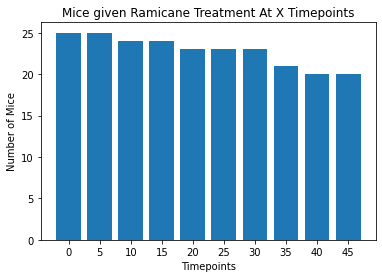

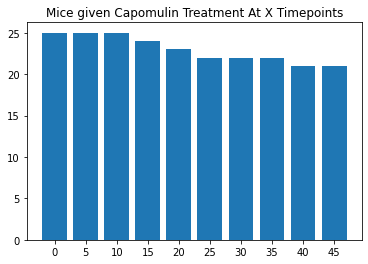

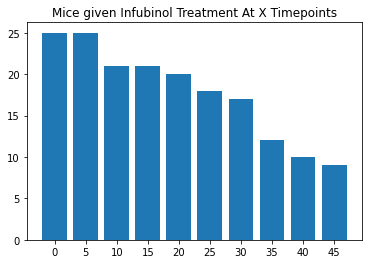

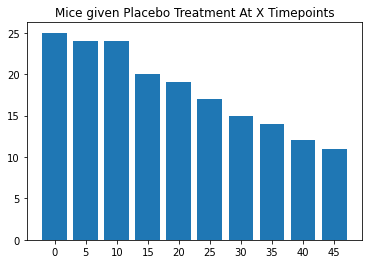

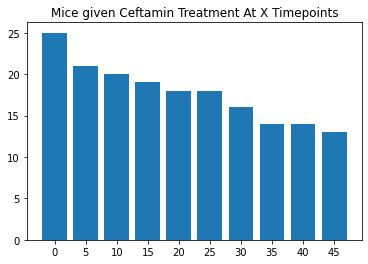

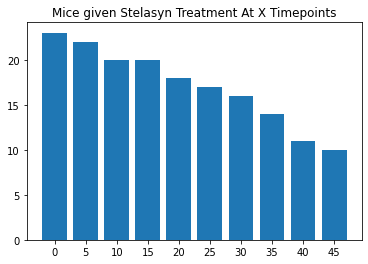

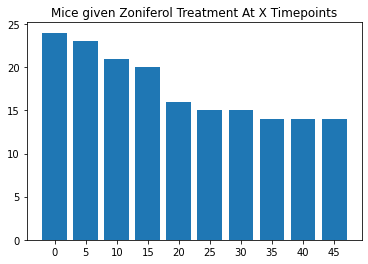

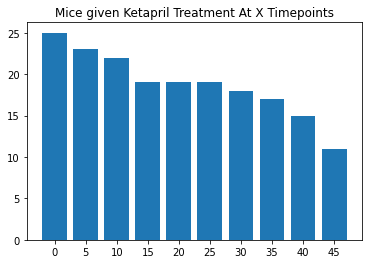

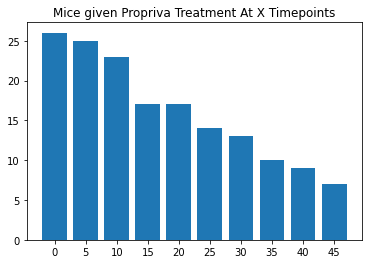

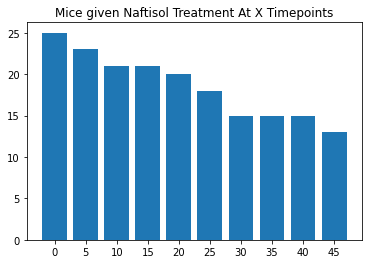

In [133]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
timepoints = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
x_axis = np.arange(len(ramicane_vals))
# x_axis
plt.bar(x_axis, ramicane_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Ramicane Treatment At X Timepoints")
plt.xlabel("Timepoints")
plt.ylabel("Number of Mice")
plt.show()

x_axis = np.arange(len(capomulin_vals))
plt.bar(x_axis, capomulin_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Capomulin Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(infubinol_vals))
plt.bar(x_axis, infubinol_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Infubinol Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(placebo_vals))
plt.bar(x_axis, placebo_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Placebo Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(ceftamin_vals))
plt.bar(x_axis, ceftamin_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Ceftamin Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(stelasyn_vals))
plt.bar(x_axis, stelasyn_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Stelasyn Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(zoniferol_vals))
plt.bar(x_axis, zoniferol_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Zoniferol Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(ketapril_vals))
plt.bar(x_axis, ketapril_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Ketapril Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(propriva_vals))
plt.bar(x_axis, propriva_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Propriva Treatment At X Timepoints")
plt.show()

x_axis = np.arange(len(naftisol_vals))
plt.bar(x_axis, naftisol_vals)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
plt.title("Mice given Naftisol Treatment At X Timepoints")
plt.show()

<AxesSubplot:ylabel='Number'>

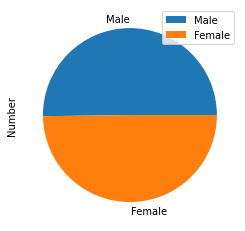

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = mouse_df_cleaned.groupby('Sex')
male_group = gender_group.get_group('Male')
n_males = male_group["Mouse ID"].nunique()
female_group = gender_group.get_group('Female')
n_females = female_group["Mouse ID"].nunique()
gender_df = pd.DataFrame({
    'Number': [n_males, n_females]
}, index=['Male', 'Female'])
pd_pie_plot = gender_df.plot.pie(y='Number')
pd_pie_plot

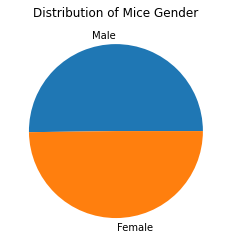

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie([n_males, n_females], labels=['Male', 'Female'])
plt.title("Distribution of Mice Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_group = mouse_df_cleaned.groupby(['Drug Regimen', 'Mouse ID'])
max_timepoints = final_tumor_group["Timepoint"].max()
# Start by getting the last (greatestepoint for each mouse
# max_timepoints["Mouse ID"].unique()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

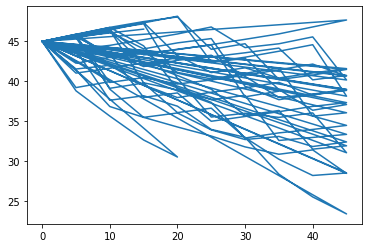

In [155]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = mouse_df_cleaned.loc[mouse_df_cleaned["Drug Regimen"] == "Capomulin"]
x = capomulin["Timepoint"]
y = capomulin["Tumor Volume (mm3)"]
plt.plot(x, y)
plt.show()

230


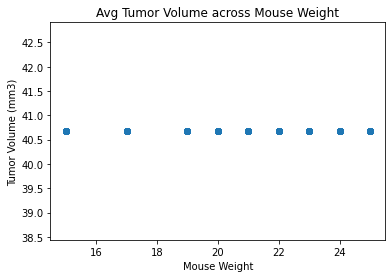

In [165]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x = capomulin["Weight (g)"]
y = capomulin["Tumor Volume (mm3)"].mean()
print(len(x))
y_final = []
for i in range(len(x)):
    y_final.append(y)
y_final
plt.scatter(x, y_final)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume across Mouse Weight")
plt.show()

## Correlation and Regression

In [164]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y_final)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y_final)
plt.plot(x, regress_values, "r-")


1.0
